In [1]:
%load_ext autoreload
%autoreload 2

import sys
sys.path.append("/home/miri/Documents/bachelorthesis/plots")
from plot_utils import *

data_path = "../data/adam_wbn"
image_path = "./images/adam_wbn"
os.makedirs(image_path,exist_ok=True)

2025-03-11 12:11:12.902765: E external/local_xla/xla/stream_executor/cuda/cuda_fft.cc:485] Unable to register cuFFT factory: Attempting to register factory for plugin cuFFT when one has already been registered
2025-03-11 12:11:12.938968: E external/local_xla/xla/stream_executor/cuda/cuda_dnn.cc:8454] Unable to register cuDNN factory: Attempting to register factory for plugin cuDNN when one has already been registered
2025-03-11 12:11:12.950149: E external/local_xla/xla/stream_executor/cuda/cuda_blas.cc:1452] Unable to register cuBLAS factory: Attempting to register factory for plugin cuBLAS when one has already been registered
2025-03-11 12:11:13.828866: W tensorflow/compiler/tf2tensorrt/utils/py_utils.cc:38] TF-TRT Warning: Could not find TensorRT


In [2]:
lr_fn = lambda js : js["optimizer"]["lr"]
p_fn = lambda js : js["norm"]["norm_multiply"]
wd_fn = lambda js : js["optimizer"]["lambda_wd"]
get_hyperparam_best_acc(data_path,
                        ["noreg","norm_p1","cnorm_p1","cnormu_p1","gcstdu_p1","norm","cnorm","cnormu","gcstdu","wd"],
                        [lr_fn,lr_fn,lr_fn,lr_fn,lr_fn,p_fn,p_fn,p_fn,p_fn,wd_fn])

Best of noreg is 0.00277778 & 86.12\%
Best of norm_p1 is 0.00025 & 87.14\%
Best of cnorm_p1 is 0.00020661 & 86.4\%
Best of cnormu_p1 is 0.00025 & 87.04\%
Best of gcstdu_p1 is 0.00025 & 87.18\%
Best of norm is 5.2 & 87.32\%
Best of cnorm is 4.0 & 87.18\%
Best of cnormu is 4.4 & 87.52\%
Best of gcstdu is 4.8 & 87.48\%
Best of wd is 3e-08 & 85.46\%


In [ ]:
fig,axs = plt.subplots(ncols=2,nrows=3,sharey="all",sharex="row")

for i,(p,max_step) in enumerate(zip(["1.2","2.0","3.0"],[400000,1.2e6,1.4e6])):

    lr = round(0.001/(float(p)**2),5)
    
    for exp,lbl in zip(["noreg","norm_p1","cnorm_p1","cnormu_p1","gcstdu_p1"],["Noreg","Norm","CNorm","CNormU","GCStdU"]):
        stats = get_stats(f"{data_path}/{exp}/{lr}","test_stats")
        if stats is not None:
            plot_step_stat(stats["acc"],axs[i][0],label=lbl,color=colors[lbl.lower()],smoothing=12,max_step=max_step)

    for exp,lbl in zip(["norm","cnorm","cnormu","gcstdu"],["Norm","CNorm","CNormU","GCStdU"]):
        stats = get_stats(f"{data_path}/{exp}/{p}_1","test_stats")
        plot_step_stat(stats["acc"],axs[i][1],label=lbl,color=colors[lbl.lower()],smoothing=12,max_step=max_step)
    axs[i][0].set_title(fr"$\mathbf{{lr={lr}}}$",font={'weight' : 'bold'})
    axs[i][1].set_title(fr"$\mathbf{{p={p}}}$",font={'weight' : 'bold'})
    axs[i][1].set_ylim(0.65,0.9) 

fig.text(-0.03, 0.5, "Validation accuracy", va='center', rotation='vertical',font={'size'   : 16,'weight' : 'normal'})

lines, labels = axs[0][0].get_legend_handles_labels()
fig.legend(lines, labels, loc='lower center', ncol=len(labels), bbox_to_anchor=(0.5,-0.075), bbox_transform=fig.transFigure)
fig.set_size_inches(12,8)
fig.tight_layout()
axs[0][0].set_ylim(0.77,0.87)
fig.savefig(f"{image_path}/lr_vs_p.png", bbox_inches='tight',dpi=300)

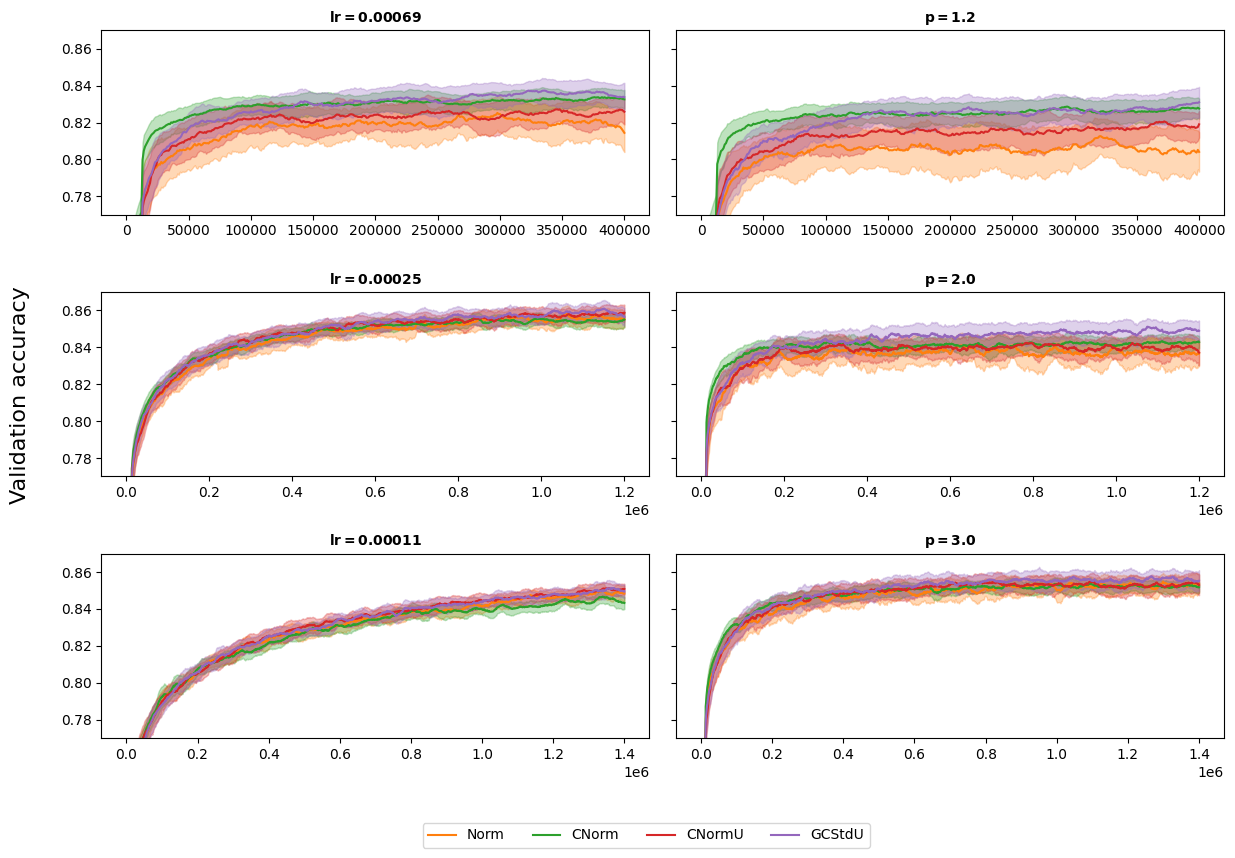

In [6]:
fig,axs = plt.subplots(ncols=2,nrows=3,sharey="all",sharex="row")

for i,(p,max_step) in enumerate(zip(["1.2","2.0","3.0"],[400000,1.2e6,1.4e6])):

    lr = round(0.001/(float(p)**2),5)
    
    for exp,lbl in zip(["norm_p1_lrfix","cnorm_p1_lrfix","cnormu_p1_lrfix","gcstdu_p1_lrfix"],["Norm","CNorm","CNormU","GCStdU"]):
        stats = get_stats(f"{data_path}/{exp}/{lr}","test_stats")
        if stats is not None:
            plot_step_stat(stats["acc"],axs[i][0],label=lbl,color=colors[lbl.lower()],smoothing=12,max_step=max_step)

    for exp,lbl in zip(["norm","cnorm","cnormu","gcstdu"],["Norm","CNorm","CNormU","GCStdU"]):
        stats = get_stats(f"{data_path}/{exp}/{p}_1","test_stats")
        plot_step_stat(stats["acc"],axs[i][1],label=lbl,color=colors[lbl.lower()],smoothing=12,max_step=max_step)
    axs[i][0].set_title(fr"$\mathbf{{lr={lr}}}$",font={'weight' : 'bold'})
    axs[i][1].set_title(fr"$\mathbf{{p={p}}}$",font={'weight' : 'bold'})
    axs[i][1].set_ylim(0.65,0.9) 

fig.text(-0.03, 0.5, "Validation accuracy", va='center', rotation='vertical',font={'size'   : 16,'weight' : 'normal'})

lines, labels = axs[0][0].get_legend_handles_labels()
fig.legend(lines, labels, loc='lower center', ncol=len(labels), bbox_to_anchor=(0.5,-0.075), bbox_transform=fig.transFigure)
fig.set_size_inches(12,8)
fig.tight_layout()
axs[0][0].set_ylim(0.77,0.87)
fig.savefig(f"{image_path}/lr_vs_p_corrected.png", bbox_inches='tight',dpi=300)

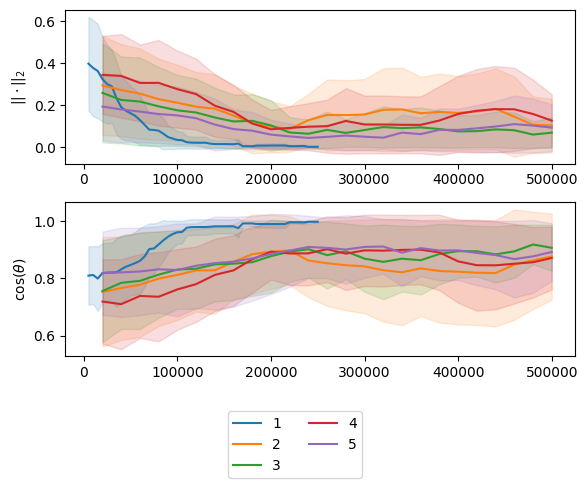

In [28]:
fig,axs = distribution_drift(data_path,["noreg/0.00011","norm_p1_lrfix/0.00011","cnorm_p1_lrfix/0.00011","cnormu_p1_lrfix/0.00011","gcstdu_p1_lrfix/0.00011"],
                             [1,2,3,4,5],
                             [colors["noreg"],colors["norm"],colors["cnorm"],colors["cnormu"],colors["gcstdu"]])

fig.set_size_inches(6,4)
fig.tight_layout()


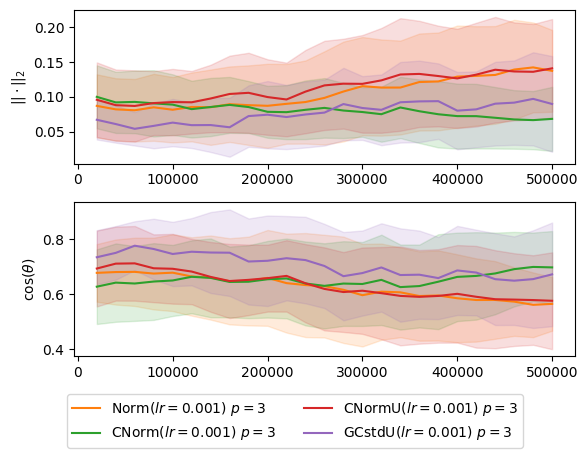

In [52]:
fig,axs = distribution_drift(data_path,["norm/3.0_1","cnorm/3.0_1","cnormu/3.0_1","gcstdu/3.0_1"],
                             [r"Norm($lr=0.001$) $p=3$",r"CNorm($lr=0.001$) $p=3$", r"CNormU($lr=0.001$) $p=3$", r"GCstdU($lr=0.001$) $p=3$"],
                             [colors["norm"],colors["cnorm"],colors["cnormu"],colors["gcstdu"]])

fig.set_size_inches(6,4)
fig.tight_layout()


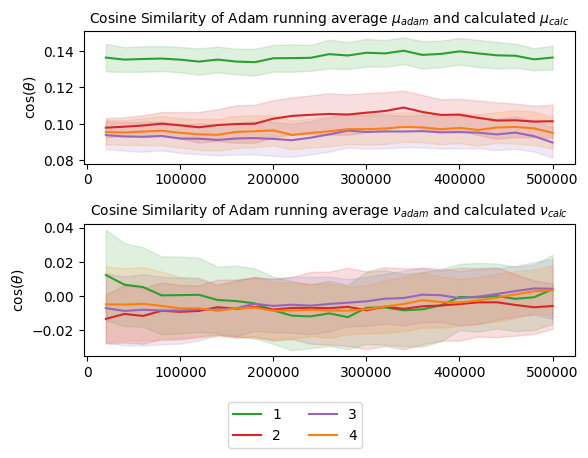

In [55]:
fig,axs = adam_drift(data_path,["cnorm/3.0_1","cnormu/3.0_1","gcstdu/3.0_1","norm/3.0_1"],
                             [1,2,3,4],
                             [colors["cnorm"],colors["cnormu"],colors["gcstdu"],colors["norm"]],drift_keys=["Conv_0","Conv_1","Conv_2","Conv_3","Conv_4","Conv_5","Conv_6","Conv_7"])

fig.set_size_inches(6,4)
fig.tight_layout()
fig.savefig(f"{image_path}/running_average_sim.png", bbox_inches='tight',dpi=1200)

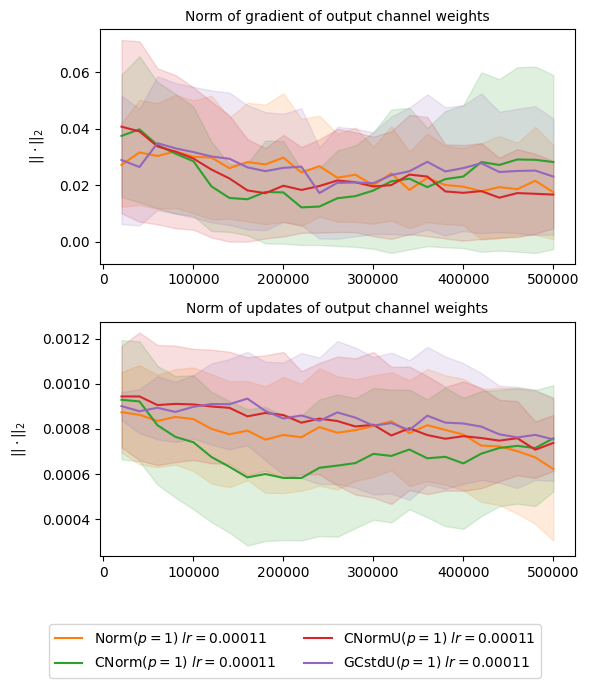

In [56]:

fig,axs = gradients_and_updates(data_path,["norm_p1_lrfix/0.00011","cnorm_p1_lrfix/0.00011","cnormu_p1_lrfix/0.00011","gcstdu_p1_lrfix/0.00011"],
                     [r"Norm($p=1$) $lr=0.00011$",r"CNorm($p=1$) $lr=0.00011$", r"CNormU($p=1$) $lr=0.00011$", r"GCstdU($p=1$) $lr=0.00011$"],
                     [colors["norm"],colors["cnorm"],colors["cnormu"],colors["gcstdu"]],"mg_spacing_0",layer="conv")

fig.set_size_inches(6,6)
fig.tight_layout()
fig.savefig(f"{image_path}/grad_and_update_norm_lr.png", bbox_inches='tight',dpi=1200)


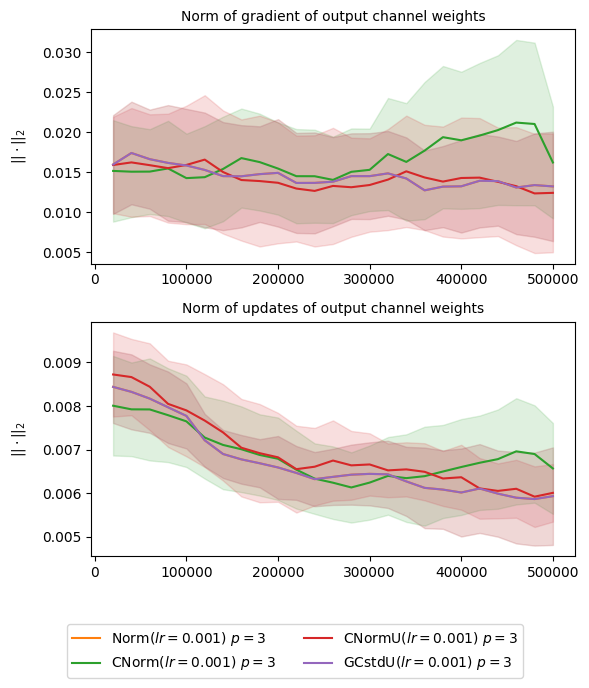

In [57]:

fig,axs = gradients_and_updates(data_path,["norm/3.0_1","cnorm/3.0_1","cnormu/3.0_1","gcstdu/3.0_1"],
                     [r"Norm($lr=0.001$) $p=3$",r"CNorm($lr=0.001$) $p=3$", r"CNormU($lr=0.001$) $p=3$", r"GCstdU($lr=0.001$) $p=3$"],
                     [colors["norm"],colors["cnorm"],colors["cnormu"],colors["gcstdu"]],"mg_spacing_0",layer="conv")

fig.set_size_inches(6,6)
fig.tight_layout()
fig.savefig(f"{image_path}/grad_and_update_norm_p.png", bbox_inches='tight',dpi=1200)


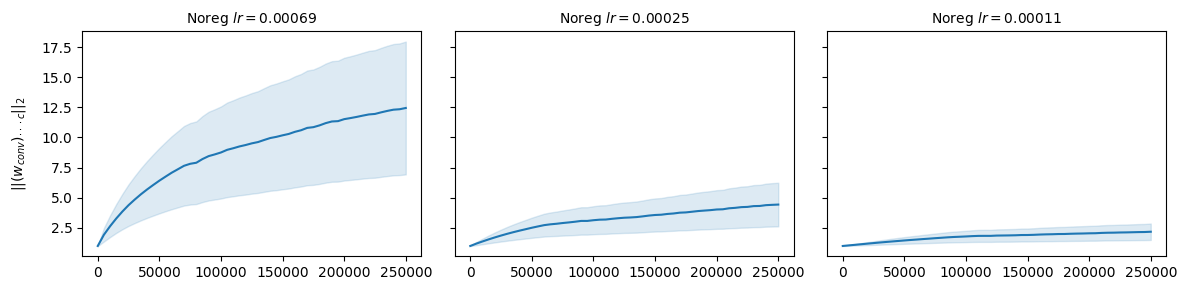

In [23]:
fig,axs = plot_mean_or_norm([f"{data_path}/noreg/0.00069",f"{data_path}/noreg/0.00025",f"{data_path}/noreg/0.00011"],
                            [r"Noreg $lr=0.00069$",r"Noreg $lr=0.00025$",r"Noreg $lr=0.00011$"],
                            [colors["noreg"],colors["noreg"],colors["noreg"]],
                            "mg_spacing_0",plot_mean=False,max_step=250000,measure_global=False)
axs[0].set_ylabel(r"$||(w_{conv})_{\cdot \cdot \cdot c}||_2$",font={"weight":"bold"},labelpad=10)
fig.set_size_inches(12,3)
fig.tight_layout()

fig.savefig(f"{image_path}/noreg_norms.png", bbox_inches='tight',dpi=1200)